In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
sns.set_context('notebook')

In [2]:
dr5_c = pd.read_csv('/home/walml/repos/zoobot/current_final_dr5_result_without_metadata.csv')

In [5]:

nsa = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/raw/nsa_v1_0_0.fits')
nsa = nsa[['RA', 'DEC', 'IAUNAME']]

nsa = nsa.to_pandas()
for col in nsa.columns.values:
    nsa[col.lower()] = nsa[col]
    del nsa[col]

nsa['iauname'] = nsa['iauname'].str.decode('utf8')

In [144]:
nsa

,ra,dec,iauname
0,146.714215,-1.041280,J094651.40-010228.5
1,146.628585,-0.765162,J094630.85-004554.5
2,146.631706,-0.988347,J094631.59-005917.7
3,146.934129,-0.670405,J094744.18-004013.4
4,146.963500,-0.544776,J094751.74-003242.0
...,...,...,...
641404,357.755712,-10.010851,J235101.08-100042.7
641405,358.197549,-10.883763,J235247.10-105259.6
641406,358.336971,-10.544118,J235320.91-103238.7
641407,358.530488,-10.405839,J235406.94-102419.7


In [55]:
nsa_classified = pd.merge(nsa, dr5_c, on='iauname', how='inner')

In [56]:
nsa_classified['high_retirement'] = nsa_classified['smooth-or-featured_total-votes'] > 37

In [57]:
nsa_classified = nsa_classified.reset_index(drop=True)

In [58]:
nsa_classified['upload_group'].value_counts()

active_random               163821
pre_active                   50946
active_priority               6999
targeted                      1387
calibration_nair_dr2_dr5      1262
Name: upload_group, dtype: int64

(array([5608., 5610., 5375., 3816., 5599., 4113., 4719., 2015.,  774.,
        1583., 4594., 4265., 5258.,  282.,  307.,  204.,  224.,  342.,
         195.,  219.,  247.,  236.,  141.,  180.,  196.,  251.,  195.,
         164.,  201.,  305.,  185.,  317.,  273.,  247.,  254.,  256.,
         331.,  191.,  237.,  339.]),
 array([     0.   ,   5610.325,  11220.65 ,  16830.975,  22441.3  ,
         28051.625,  33661.95 ,  39272.275,  44882.6  ,  50492.925,
         56103.25 ,  61713.575,  67323.9  ,  72934.225,  78544.55 ,
         84154.875,  89765.2  ,  95375.525, 100985.85 , 106596.175,
        112206.5  , 117816.825, 123427.15 , 129037.475, 134647.8  ,
        140258.125, 145868.45 , 151478.775, 157089.1  , 162699.425,
        168309.75 , 173920.075, 179530.4  , 185140.725, 190751.05 ,
        196361.375, 201971.7  , 207582.025, 213192.35 , 218802.675,
        224413.   ]),
 <a list of 40 Patch objects>)

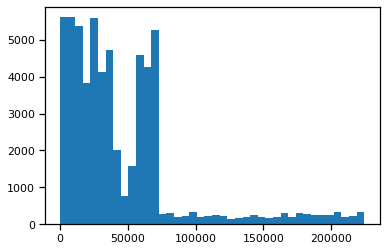

In [59]:
plt.hist(nsa_classified[nsa_classified['high_retirement']].index.values, bins=40)

(array([5.405e+03, 5.542e+03, 5.301e+03, 3.482e+03, 5.598e+03, 3.904e+03,
        4.620e+03, 1.761e+03, 5.370e+02, 1.368e+03, 4.373e+03, 4.114e+03,
        5.215e+03, 4.500e+01, 4.000e+01, 3.000e+01, 3.300e+01, 6.200e+01,
        3.800e+01, 4.300e+01, 5.200e+01, 4.800e+01, 1.800e+01, 4.500e+01,
        5.400e+01, 7.100e+01, 4.000e+01, 3.200e+01, 4.300e+01, 5.800e+01,
        3.500e+01, 5.500e+01, 7.600e+01, 4.400e+01, 9.000e+00, 5.000e+00,
        3.600e+01, 2.000e+01, 2.000e+01, 6.100e+01]),
 array([     0. ,   5609.4,  11218.8,  16828.2,  22437.6,  28047. ,
         33656.4,  39265.8,  44875.2,  50484.6,  56094. ,  61703.4,
         67312.8,  72922.2,  78531.6,  84141. ,  89750.4,  95359.8,
        100969.2, 106578.6, 112188. , 117797.4, 123406.8, 129016.2,
        134625.6, 140235. , 145844.4, 151453.8, 157063.2, 162672.6,
        168282. , 173891.4, 179500.8, 185110.2, 190719.6, 196329. ,
        201938.4, 207547.8, 213157.2, 218766.6, 224376. ]),
 <a list of 40 Patch objects>)

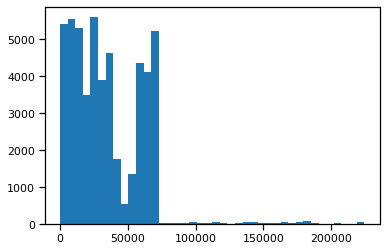

In [60]:
plt.hist(nsa_classified[nsa_classified['upload_group'].isin(['pre_active', 'targeted'])].query('high_retirement').index.values, bins=40)

(array([579., 723., 724., 715., 715., 697., 718., 720., 715., 708., 726.,
        719., 718., 718., 723., 710., 725., 690., 525., 727., 717., 681.,
        725., 483., 438., 426., 268.,   0., 571., 727., 728., 726., 726.,
        727., 727., 727., 721., 724., 581., 389., 429., 633., 565., 456.,
        519., 529., 725., 725., 727., 727., 726., 473., 195., 521., 687.,
        619., 405.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 328., 172.,   0.,   0.,   0.,   0.,   0., 606., 632.,
        717., 386., 461., 311., 575., 662., 716., 722., 429., 384., 726.,
        602., 465., 495., 597., 443., 721., 724., 719., 723., 724., 723.,
        715.]),
 array([    0. ,   727.1,  1454.2,  2181.3,  2908.4,  3635.5,  4362.6,
         5089.7,  5816.8,  6543.9,  7271. ,  7998.1,  8725.2,  9452.3,
        10179.4, 10906.5, 11633.6, 12360.7, 13087.8, 13814.9, 14542. ,
        15269.1, 15996.2, 16723.3, 17450.4, 18177.5, 18904.6, 19631.7,
        20358.8, 21085.9, 21813. ,

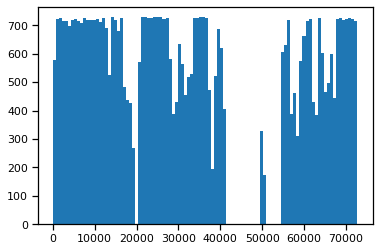

In [61]:
plt.hist(nsa_classified[nsa_classified['upload_group'].isin(['pre_active'])].query('high_retirement').index.values, bins=100)

In [62]:
# broadly, galaxies from 0-42k and 57k-73k were uploaded and classified to N=40, and the rest were not (N=5)
# getting the exact numbers:
random = nsa_classified[nsa_classified['upload_group'].isin(['pre_active'])]

In [96]:
# <= 41442
random.iloc[35460:35490]['high_retirement']

41135    True
41136    True
41137    True
41138    True
41139    True
41140    True
41141    True
41142    True
49841    True
49842    True
49843    True
49844    True
49845    True
49846    True
49847    True
49848    True
49849    True
49850    True
49851    True
49852    True
49853    True
49854    True
49855    True
49856    True
49857    True
49858    True
49859    True
49860    True
49861    True
49862    True
Name: high_retirement, dtype: bool

In [127]:
# >= 54615, except for a little spike near 5k
random.iloc[35960:35980]['high_retirement']

50336    True
50337    True
50338    True
50339    True
50340    True
50341    True
50342    True
50343    True
54615    True
54616    True
54617    True
54618    True
54619    True
54620    True
54621    True
54622    True
54623    True
54624    True
54625    True
54626    True
Name: high_retirement, dtype: bool

In [129]:
# <=72710
random.index.values.max()

72710

In [135]:
targeted = nsa_classified[nsa_classified['upload_group'].isin(['targeted'])]

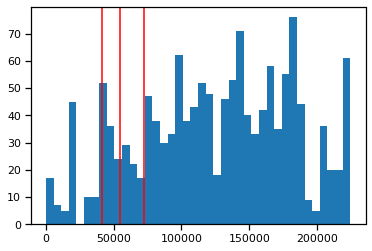

In [136]:
plt.hist(targeted.index.values, bins=40)
plt.axvline(41442, color='r')
plt.axvline(54615, color='r')
plt.axvline(72710, color='r')

In [142]:
would_have_included = (targeted.index.values <= 41442) | ( (targeted.index.values >= 54615) & (targeted.index.values < 72710))
len(targeted), would_have_included.sum(), would_have_included.mean()

(1387, 177, 0.12761355443403027)

In [143]:
len(targeted) - would_have_included.sum()

1210